In [1]:
import glob
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [3]:
training = glob.glob('./*.csv')

In [4]:
training

['./test_kain.csv', './test_abel.csv']

In [5]:
data = []
df = pd.read_csv('./test_kain.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = 'kain (FSM)'
data.append(df)
df = pd.read_csv('./test_abel.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = 'abel (DQN)'
data.append(df)
data = pd.concat(data)

In [6]:
grouped = data.groupby('type')

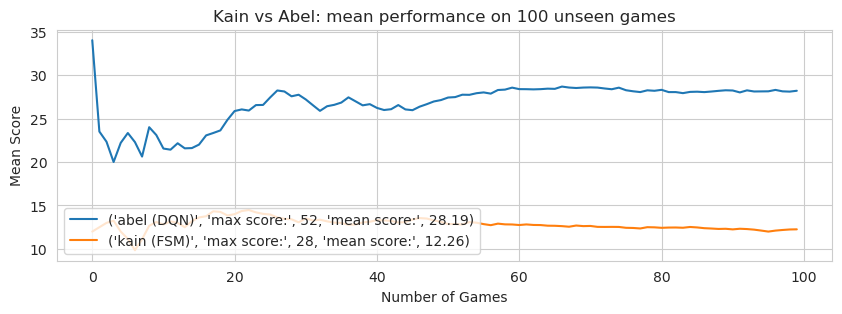

In [40]:
plt.figure(figsize=(10,3))
plt.clf()
plt.title('Kain vs Abel: mean performance on 100 unseen games')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append((g['type'].values[0], 
                          'max score:', g['scores'].max(),
                         'mean score:', g['mean_scores'].tail(1).values[0]))
plt.legend(legend_labels, loc='lower left')
plt.show()

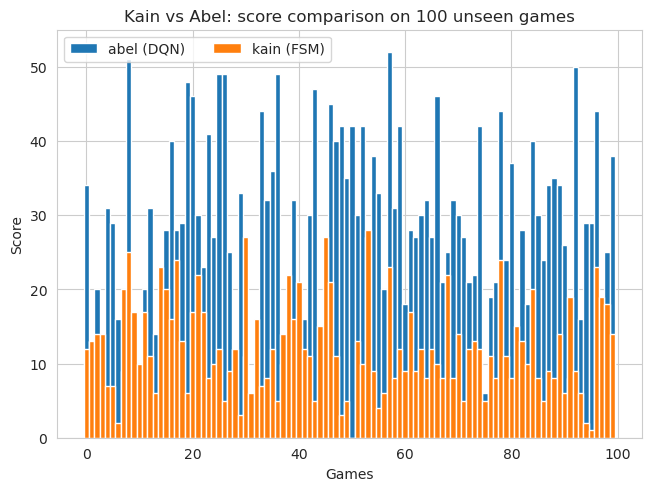

In [44]:
import numpy as np

species = data.loc[data['type'] == 'kain (FSM)']['iteration']
penguin_means = {
    'abel (DQN)': data.loc[data['type'] == 'abel (DQN)']['scores'],
    'kain (FSM)': data.loc[data['type'] == 'kain (FSM)']['scores'],
}

x = np.arange(len(species))  # the label locations
width = 1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    #multiplier += 2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xlabel('Games')
ax.set_title('Kain vs Abel: score comparison on 100 unseen games')
#ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 55)

plt.show()

In [28]:
data.loc[data['type'] == 'kain (FSM)']['scores']

0     12
1     13
2     14
3     14
4      7
      ..
95     1
96    23
97    19
98    18
99    14
Name: scores, Length: 100, dtype: int64